In [72]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [73]:
# h5_file = "20250119-112036_pluto_3state.h5"
# h5_file = "20250119-112446_pluto_3state.h5"
# h5_file = "20250119-112655_pluto_3state.h5"
# h5_file = "20250119-113014_pluto_3state.h5"
# h5_file = "20250119-113718_pluto_3state.h5"
# h5_file = "20250119-115132_pluto_3state.h5"

# h5_file = "20250119-120236_pluto_3state.h5"
# h5_file = "20250119-120426_pluto_3state.h5"
# h5_file = "20250119-121102_pluto_3state.h5"
h5_file = "20250119-121422_pluto_3state.h5"

Reading 20250119-121422_pluto_3state.h5
1737260075.0741098


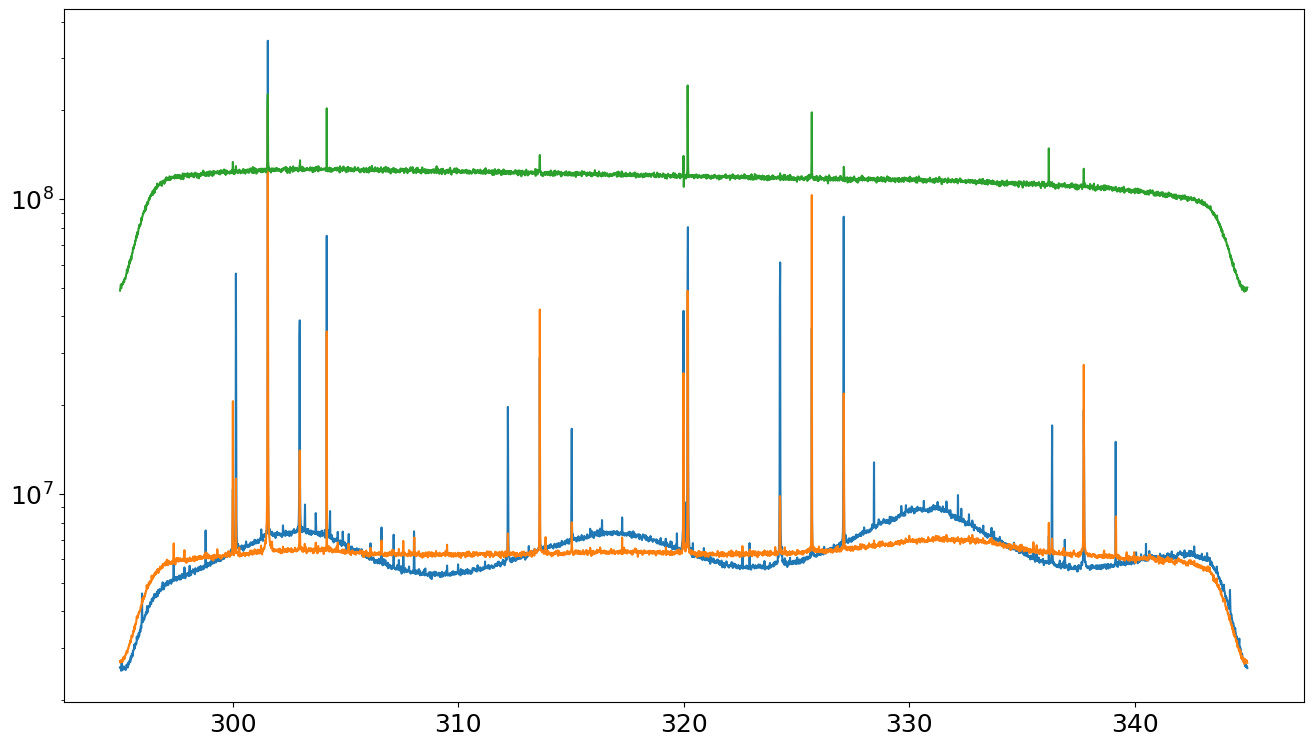

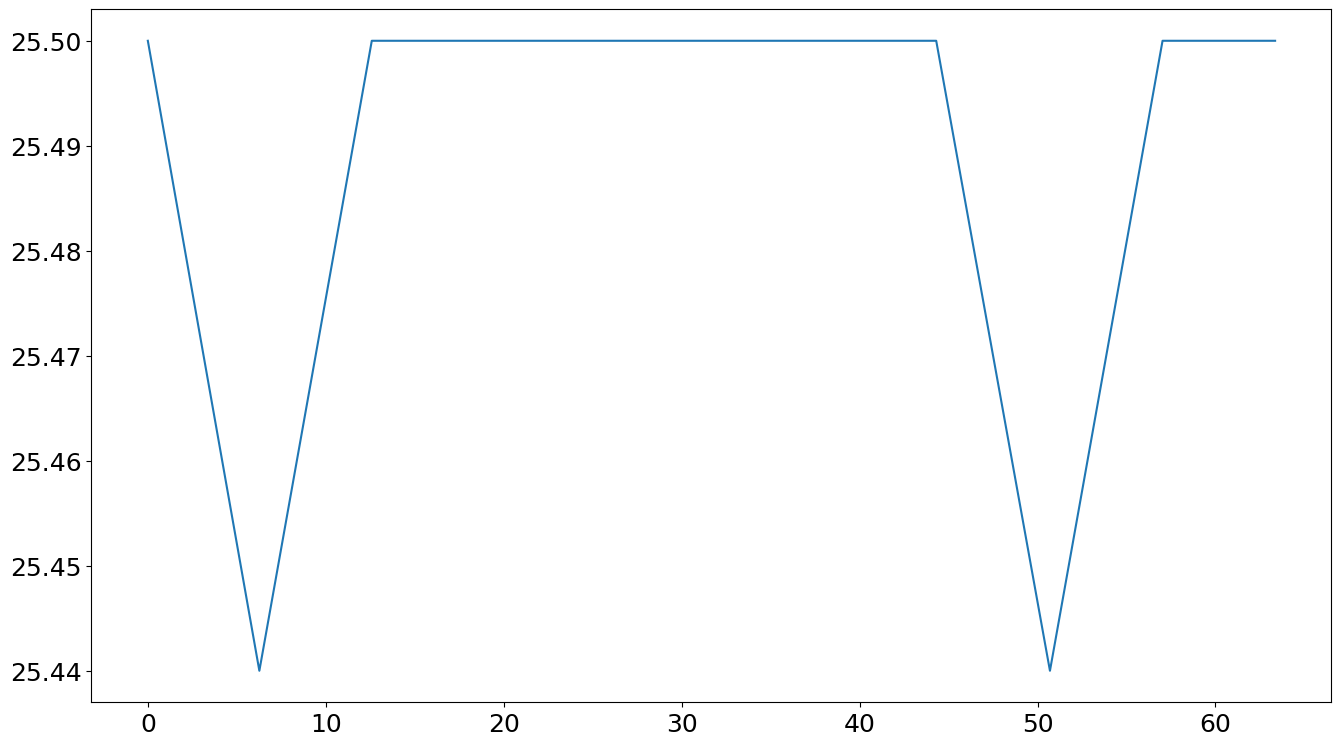

In [74]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

NFFT = hf["data"].attrs['NFFT']
fc = hf["data"].attrs['fc']
fs = hf["data"].attrs['fs']
gain = hf["data"].attrs['gain']

freq = np.linspace(fc-(fs/2), fc+(fs/2), NFFT)/1e6

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)-1

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]
temperature = hf["data/temperature"][()][ant_index]

ant_tstamps = hf["data/timestamps"][()][ant_index]
print (ant_tstamps[0])
ant_tstamps = ant_tstamps - ant_tstamps[0]

hf.close()

plt.figure(figsize=(16,9))
plt.semilogy(freq, np.mean(ant_data, axis=0))
plt.semilogy(freq, np.mean(cold_data, axis=0))
plt.semilogy(freq, np.mean(hot_data, axis=0))

plt.figure(figsize=(16,9))
plt.plot(ant_tstamps, temperature)


In [75]:
ant_calibrated = ant_data/(hot_data - cold_data)
cold_calibrated = cold_data/(hot_data - cold_data)
hot_calibrated = hot_data/(hot_data - cold_data)

mean_ant_power = np.mean(ant_calibrated, axis=1)
mean_cold_power = np.mean(cold_calibrated, axis=1)
mean_hot_power = np.mean(hot_calibrated, axis=1)

mean_ant_spectrum = np.mean(ant_calibrated, axis=0)
mean_cold_spectrum = np.mean(cold_calibrated, axis=0)
mean_hot_spectrum = np.mean(hot_calibrated, axis=0)

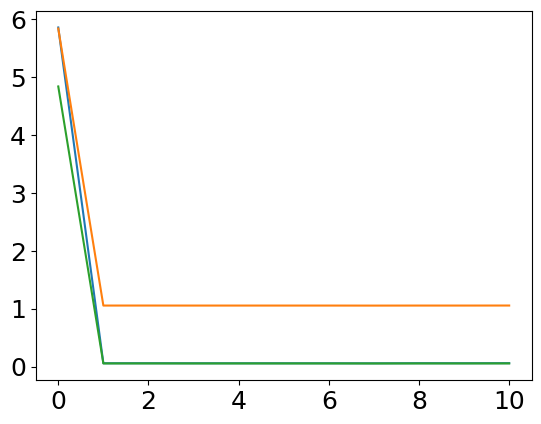

In [85]:
plt.figure()
plt.plot(mean_ant_power)
plt.plot(mean_hot_power)
plt.plot(mean_cold_power)

(-0.05, 0.05)

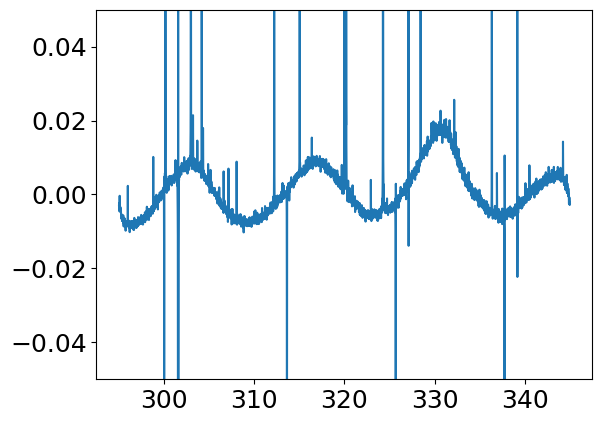

In [81]:
av_cal_spec = (np.mean(ant_data, axis=0) - np.mean(cold_data, axis=0))/(np.mean(hot_data, axis=0) - np.mean(cold_data, axis=0))

plt.plot(freq, av_cal_spec)
plt.ylim(-0.05, 0.05)

In [77]:
# t_array = []
# rms_array = []
# for i in range(1, len_cal_data):
#     mean_ant_spectrum = np.mean(ant_calibrated[0:i], axis=0)
#     mean_cold_spectrum = np.mean(cold_calibrated[0:i], axis=0)

#     ant_rms = np.std(mean_ant_spectrum-mean_cold_spectrum)
#     # ant_rms = np.std(mean_ant_spectrum)
#     # ant_rms = np.std(mean_cold_spectrum)

#     rms_array = np.append(rms_array, ant_rms)
#     t_array = np.append(t_array, ant_tstamps[i])

# plt.figure(figsize=(16,9))
# plt.loglog(t_array, rms_array)